In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('amazon.csv', encoding='iso-8859-1', parse_dates = ['date'])
#encode 'iso -8859-1'

In [3]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
df.dtypes   #nepaldatesystem

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [5]:
df.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

In [6]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [7]:
df['new_month'] = df['month'].map(
    {
        'Janeiro':'January',
        'Fevereiro':'February',
        'Março' : 'March',
        'Abril':'April',
        'Maio':'May',
        'Junho':'June',
        'Julho':'July',
        'Agosto':'Agusut',
        'Setembro':'September',
        'Outubro':'October',
        'Novembro':'November',
        'Dezembro':'December'
    }

)

In [8]:
df['new_month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'Agusut', 'September', 'October', 'November', 'December'],
      dtype=object)

In [9]:
df['new_month'].value_counts().sort_values(ascending = False)

January      541
February     540
March        540
April        540
May          540
June         540
July         540
Agusut       540
September    540
October      540
November     540
December     513
Name: new_month, dtype: int64

In [10]:
df['new_month'].max()

'September'

In [11]:
df.groupby('state')['new_month'].max().head(1)

state
Acre    September
Name: new_month, dtype: object

In [12]:
df.groupby('year')['number'].max().reset_index()

,year,number
0,1998,875.0
1,1999,982.0
2,2000,925.0
3,2001,979.0
4,2002,976.0
5,2003,977.0
6,2004,960.0
7,2005,948.0
8,2006,995.0
9,2007,982.0


In [13]:
#amazonos
amazonos = df[df['state'] == 'Amazonas']

In [14]:
amazonos.groupby('year')['number'].sum().reset_index()

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


In [15]:
df['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016'),
  Text(19, 0, '2017')])

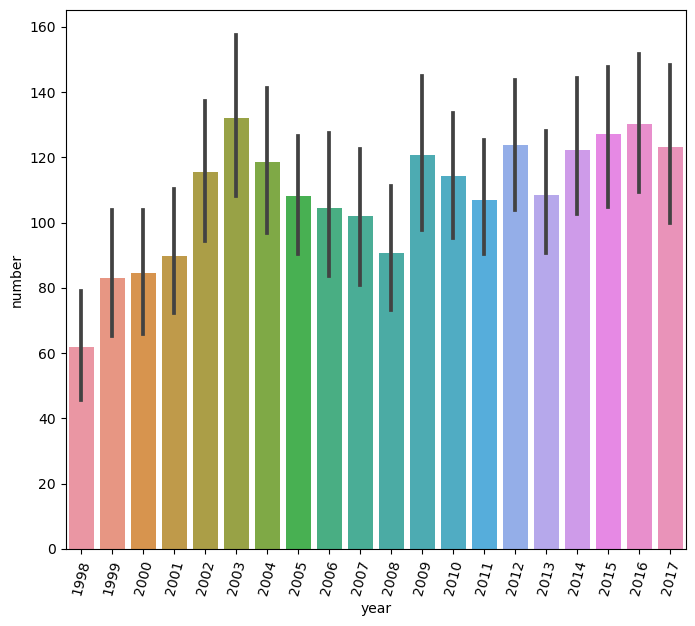

In [17]:
plt.figure(figsize = (8,7))
sns.barplot(data = df , x = 'year' , y = 'number')
plt.xticks(rotation = 75)

In [32]:
# to find state names where fires were reported in 'Dec' month 
# find the number of fires were reported in 2015 and visualized data based on each "month"

december = df[df['new_month'] == 'December'][['state','new_month']]

In [34]:
december.head(5)

,state,new_month
220,Acre,December
221,Acre,December
222,Acre,December
223,Acre,December
224,Acre,December


In [31]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [37]:
df.drop('month',axis = 1, inplace = True)

In [38]:
df.columns

Index(['year', 'state', 'number', 'date', 'new_month'], dtype='object')

In [46]:
fire2015 = df[df['year'] == 2015]  #[['year','number']] #.sort_values(by = 'number' , ascending = False)

In [89]:

fires_by_month = fire2015.groupby('new_month')['year'].value_counts()

In [90]:
fires_by_month

new_month  year
Agusut     2015    27
April      2015    27
December   2015    27
February   2015    27
January    2015    27
July       2015    27
June       2015    27
March      2015    27
May        2015    27
November   2015    27
October    2015    27
September  2015    27
Name: year, dtype: int64

In [97]:
fires_by_month0 = fire2015.groupby('new_month')['number'].count().reset_index(name='fires_count')


In [98]:
fires_by_month0

,new_month,fires_count
0,Agusut,27
1,April,27
2,December,27
3,February,27
4,January,27
5,July,27
6,June,27
7,March,27
8,May,27
9,November,27


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Agusut'),
  Text(1, 0, 'April'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

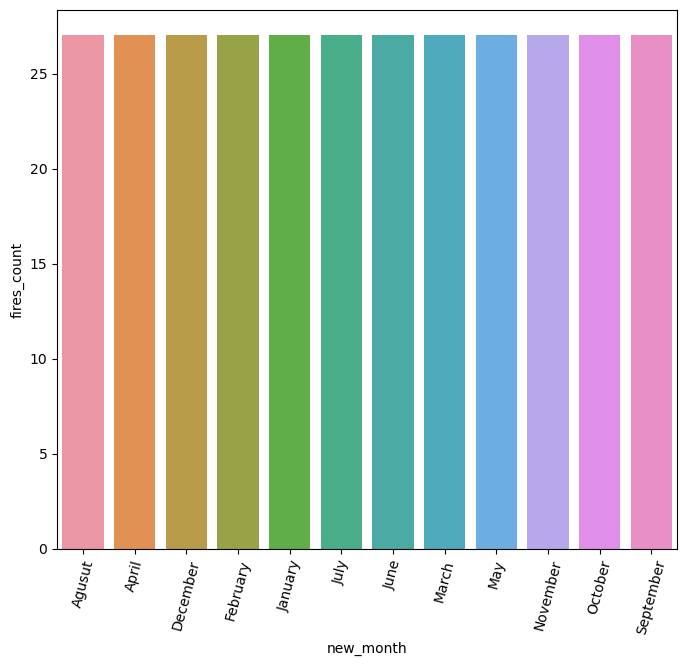

In [103]:
plt.figure(figsize = (8,7))
sns.barplot(data = df , x = fires_by_month0['new_month'] , y = fires_by_month0['fires_count'])
plt.xticks(rotation = 75)

In [1]:
#number of fire reported day wise